# 

<img align="left" src = https://linea.org.br/wp-content/themes/LIneA/imagens/logo-header.jpg width=100 style="padding: 20px"> 

<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=160 style="padding: 20px">  

# QA DP0.2 - Input files 

**Contact author**: Heloisa da Silva Mengisztki ([heloisasmengisztki@gmail.com](mailto:heloisasmengisztki@gmail.com)) 

**Last verified run**: 2023-05-01 (YYYY-MM-DD) <br><br><br>

This notebook is a quality analysis of the dp0.2 data.


## CONTINUAR - O QUE AINDA NÃO TEM AQUI :) 

Descrever as coisas

Descrever como foi feito o training set e test set (esse ainda n tem)

Plots e métricas de qualidade:
- Métricas de treinamento eficaz (Evaluate do rail)
Plotzinho de bias, etc



## Imports

In [1]:
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tables_io 

pd.set_option('display.max_rows', 20)

%matplotlib inline

## Reading file local - training

In [2]:
import rail

from rail.core.utils import RAILDIR
from rail.core.data import Hdf5Handle,TableHandle, PqHandle
from rail.core.stage import RailStage

DS = RailStage.data_store
DS.__class__.allow_overwrite = True

158M com 2 437 615 rows × 21 columns

In [3]:
CURR_DIR =  os.getcwd()

In [4]:
test_stage = DS.read_file('input', PqHandle, "/home/heloisa.mengisztki/data/training_set_dp0.2.pq")
test_stage().keys()
test_table = tables_io.convertObj(test_stage(), tables_io.types.PD_DATAFRAME)
test_table.head()

,ra,dec,redshift,flux_u_noMW,flux_g_noMW,flux_r_noMW,flux_i_noMW,flux_z_noMW,flux_y_noMW,magerr_u,...,magerr_r,magerr_i,magerr_z,magerr_y,mag_u,mag_g,mag_r,mag_i,mag_z,mag_y
0,53.768951,-31.031512,0.835406,33.997601,40.818699,56.532200,126.769997,140.156006,140.044998,NaN,...,0.125884,0.107339,0.195172,NaN,NaN,27.326308,26.803749,26.274587,NaN,NaN
1,53.845242,-30.786538,0.729749,4.244640,6.951910,15.119200,31.441299,35.235199,38.383598,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53.784315,-30.740879,0.834945,49.206200,62.054199,88.069099,203.082001,227.445007,223.649002,NaN,...,0.081690,0.067927,0.120269,NaN,NaN,26.857633,26.452554,25.763677,25.518102,NaN
3,53.850632,-30.740100,1.483500,15.596200,15.477000,14.476800,15.023700,15.214200,24.674200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53.849039,-30.928151,0.985740,21.177799,20.943300,23.737700,37.522202,54.010300,55.012001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
original_parq = DS.read_file('input', PqHandle, "~/data/output.pq")
original_parq().keys()
original_df = tables_io.convertObj(original_parq(), tables_io.types.PD_DATAFRAME)
original_df.head()

column,shape_xx,coord_dec,sky_object,detect_isDeblendedModelSource,detect_isDeblendedSource,detect_isPatchInner,xErr,coord_ra,shape_flag,x,...,u_kronFlux_flag,u_kronFlux_flag_bad_radius,u_kronFlux_flag_bad_shape,u_kronFlux_flag_bad_shape_no_psf,u_kronFlux_flag_edge,u_kronFlux_flag_no_fallback_radius,u_kronFlux_flag_no_minimum_radius,u_kronFlux_flag_small_radius,u_kronFlux_flag_used_minimum_radius,u_kronFlux_flag_used_psf_radius
objectId,,,,,,,,,,,,,,,,,,,,,
1823676374108340225,5.854502,-34.031147,False,False,False,False,NaN,63.924370,True,8107.0,...,True,False,True,False,True,False,False,False,False,False
1823676374108340226,11.507432,-34.030682,False,False,False,False,NaN,63.895008,True,8545.0,...,True,False,True,False,False,False,False,False,False,False
1823676374108340228,5.348294,-34.031276,False,False,True,False,NaN,63.882006,True,8739.0,...,True,False,True,False,True,False,False,False,False,False
1823676374108340229,10.257924,-34.031293,False,False,False,False,NaN,63.875705,True,8833.0,...,True,False,True,False,True,False,False,False,False,False
1823676374108340230,19.876915,-34.031305,False,False,False,False,NaN,63.871482,True,8896.0,...,True,False,True,False,True,False,False,False,False,False


In [6]:
preprocessed_file = DS.read_file('input', TableHandle, "/home/heloisa.mengisztki/data/objectTable_tract_4231_DC2_2_2i_runs_DP0_2_v23_0_1_PREOPS-905_step3_20_20220303T145311Z-part0.pq")
preprocessed_df = tables_io.convertObj(preprocessed_file(), tables_io.types.PD_DATAFRAME)
len(preprocessed_df)

142851

In [7]:
merged_df = pd.merge(preprocessed_df, original_df, left_on='objectId', right_on='objectId')
len(merged_df)

/tmp/ipykernel_18531/2720413084.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = pd.merge(preprocessed_df, original_df, left_on='objectId', right_on='objectId')


142851

In [8]:
merged_df.head()

column,mag_u,mag_g,mag_r,mag_i,mag_z,mag_y,magerr_u,magerr_g,magerr_r,magerr_i,...,u_kronFlux_flag,u_kronFlux_flag_bad_radius,u_kronFlux_flag_bad_shape,u_kronFlux_flag_bad_shape_no_psf,u_kronFlux_flag_edge,u_kronFlux_flag_no_fallback_radius,u_kronFlux_flag_no_minimum_radius,u_kronFlux_flag_small_radius,u_kronFlux_flag_used_minimum_radius,u_kronFlux_flag_used_psf_radius
objectId,,,,,,,,,,,,,,,,,,,,,
1823676374108340225,26.049764,24.551304,23.243410,22.522753,22.274543,22.107124,0.341586,0.031933,0.010057,0.010449,...,True,False,True,False,True,False,False,False,False,False
1823676374108340226,17.469161,16.445043,16.138118,15.962194,15.878191,15.854712,0.001035,0.000247,0.000173,0.000197,...,True,False,True,False,False,False,False,False,False,False
1823676374108340228,26.376510,25.837772,24.936756,23.880173,23.580505,23.481174,0.457533,0.102821,0.048750,0.035277,...,True,False,True,False,True,False,False,False,False,False
1823676374108340229,26.406040,26.382988,25.524869,25.218547,24.881561,25.047350,0.467118,0.166454,0.083470,0.118166,...,True,False,True,False,True,False,False,False,False,False
1823676374108340230,26.037652,25.852152,25.606367,25.210751,24.838556,25.287063,0.330039,0.104058,0.089570,0.116232,...,True,False,True,False,True,False,False,False,False,False


## Métricas base

População: nesse caso a população seria todos os dados que são galáxias coletados pelo Blanco telescópio, toda a base de dados

Amostra: nesse caso pode ser ou o arquivo que vamos ler direto do diretório ou os dados do TAP ou a amostra definida pela Melissa

Variáveis: nesse caso seriam as características por exemplo no TAP de limite de banda

#### Medidas de tendência central

Média - valor que representa o “meio” dos dados

Mediana - o meio de um conjunto organizado 

Moda - o número que mais se repete no conjunto

## Plot - Localização amostra

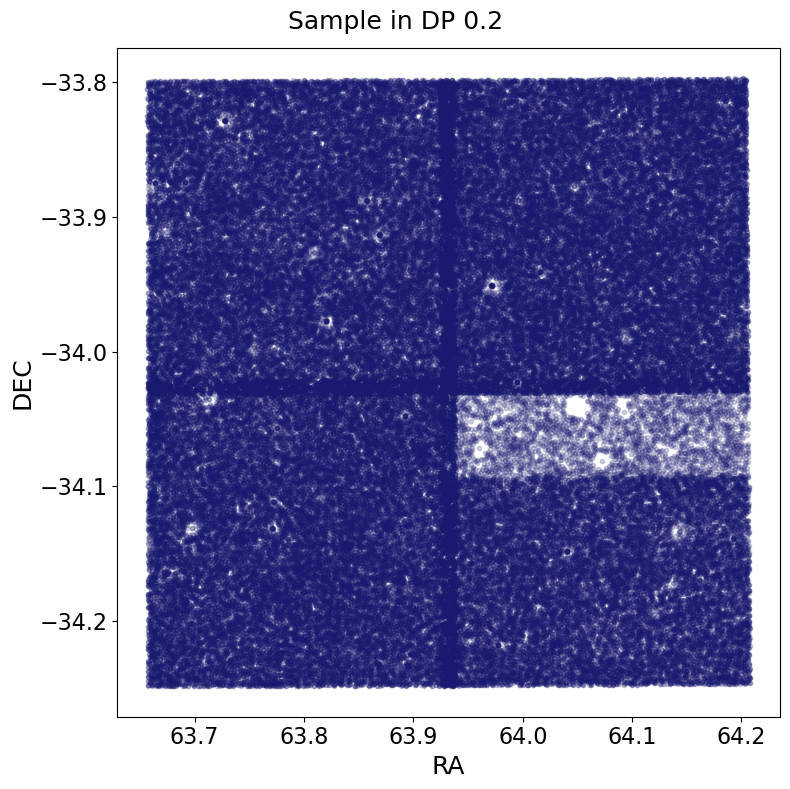

In [9]:
plt.figure(figsize=[8,8])
plt.suptitle("Sample in DP 0.2", fontsize=18)

plt.plot(merged_df.coord_ra, merged_df.coord_dec, f".", color="midnightblue", alpha=0.2)
plt.xlabel("RA", fontsize=18)
plt.ylabel("DEC", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xticks(fontsize=16)
plt.tight_layout()

## Hist - Qtd Magnitude

In [10]:
banda_cor = {
    "u": "r",
    "g": "m",
    "r": "b",
    "i": "c",
    "z": "g",
    "y": "y",
}

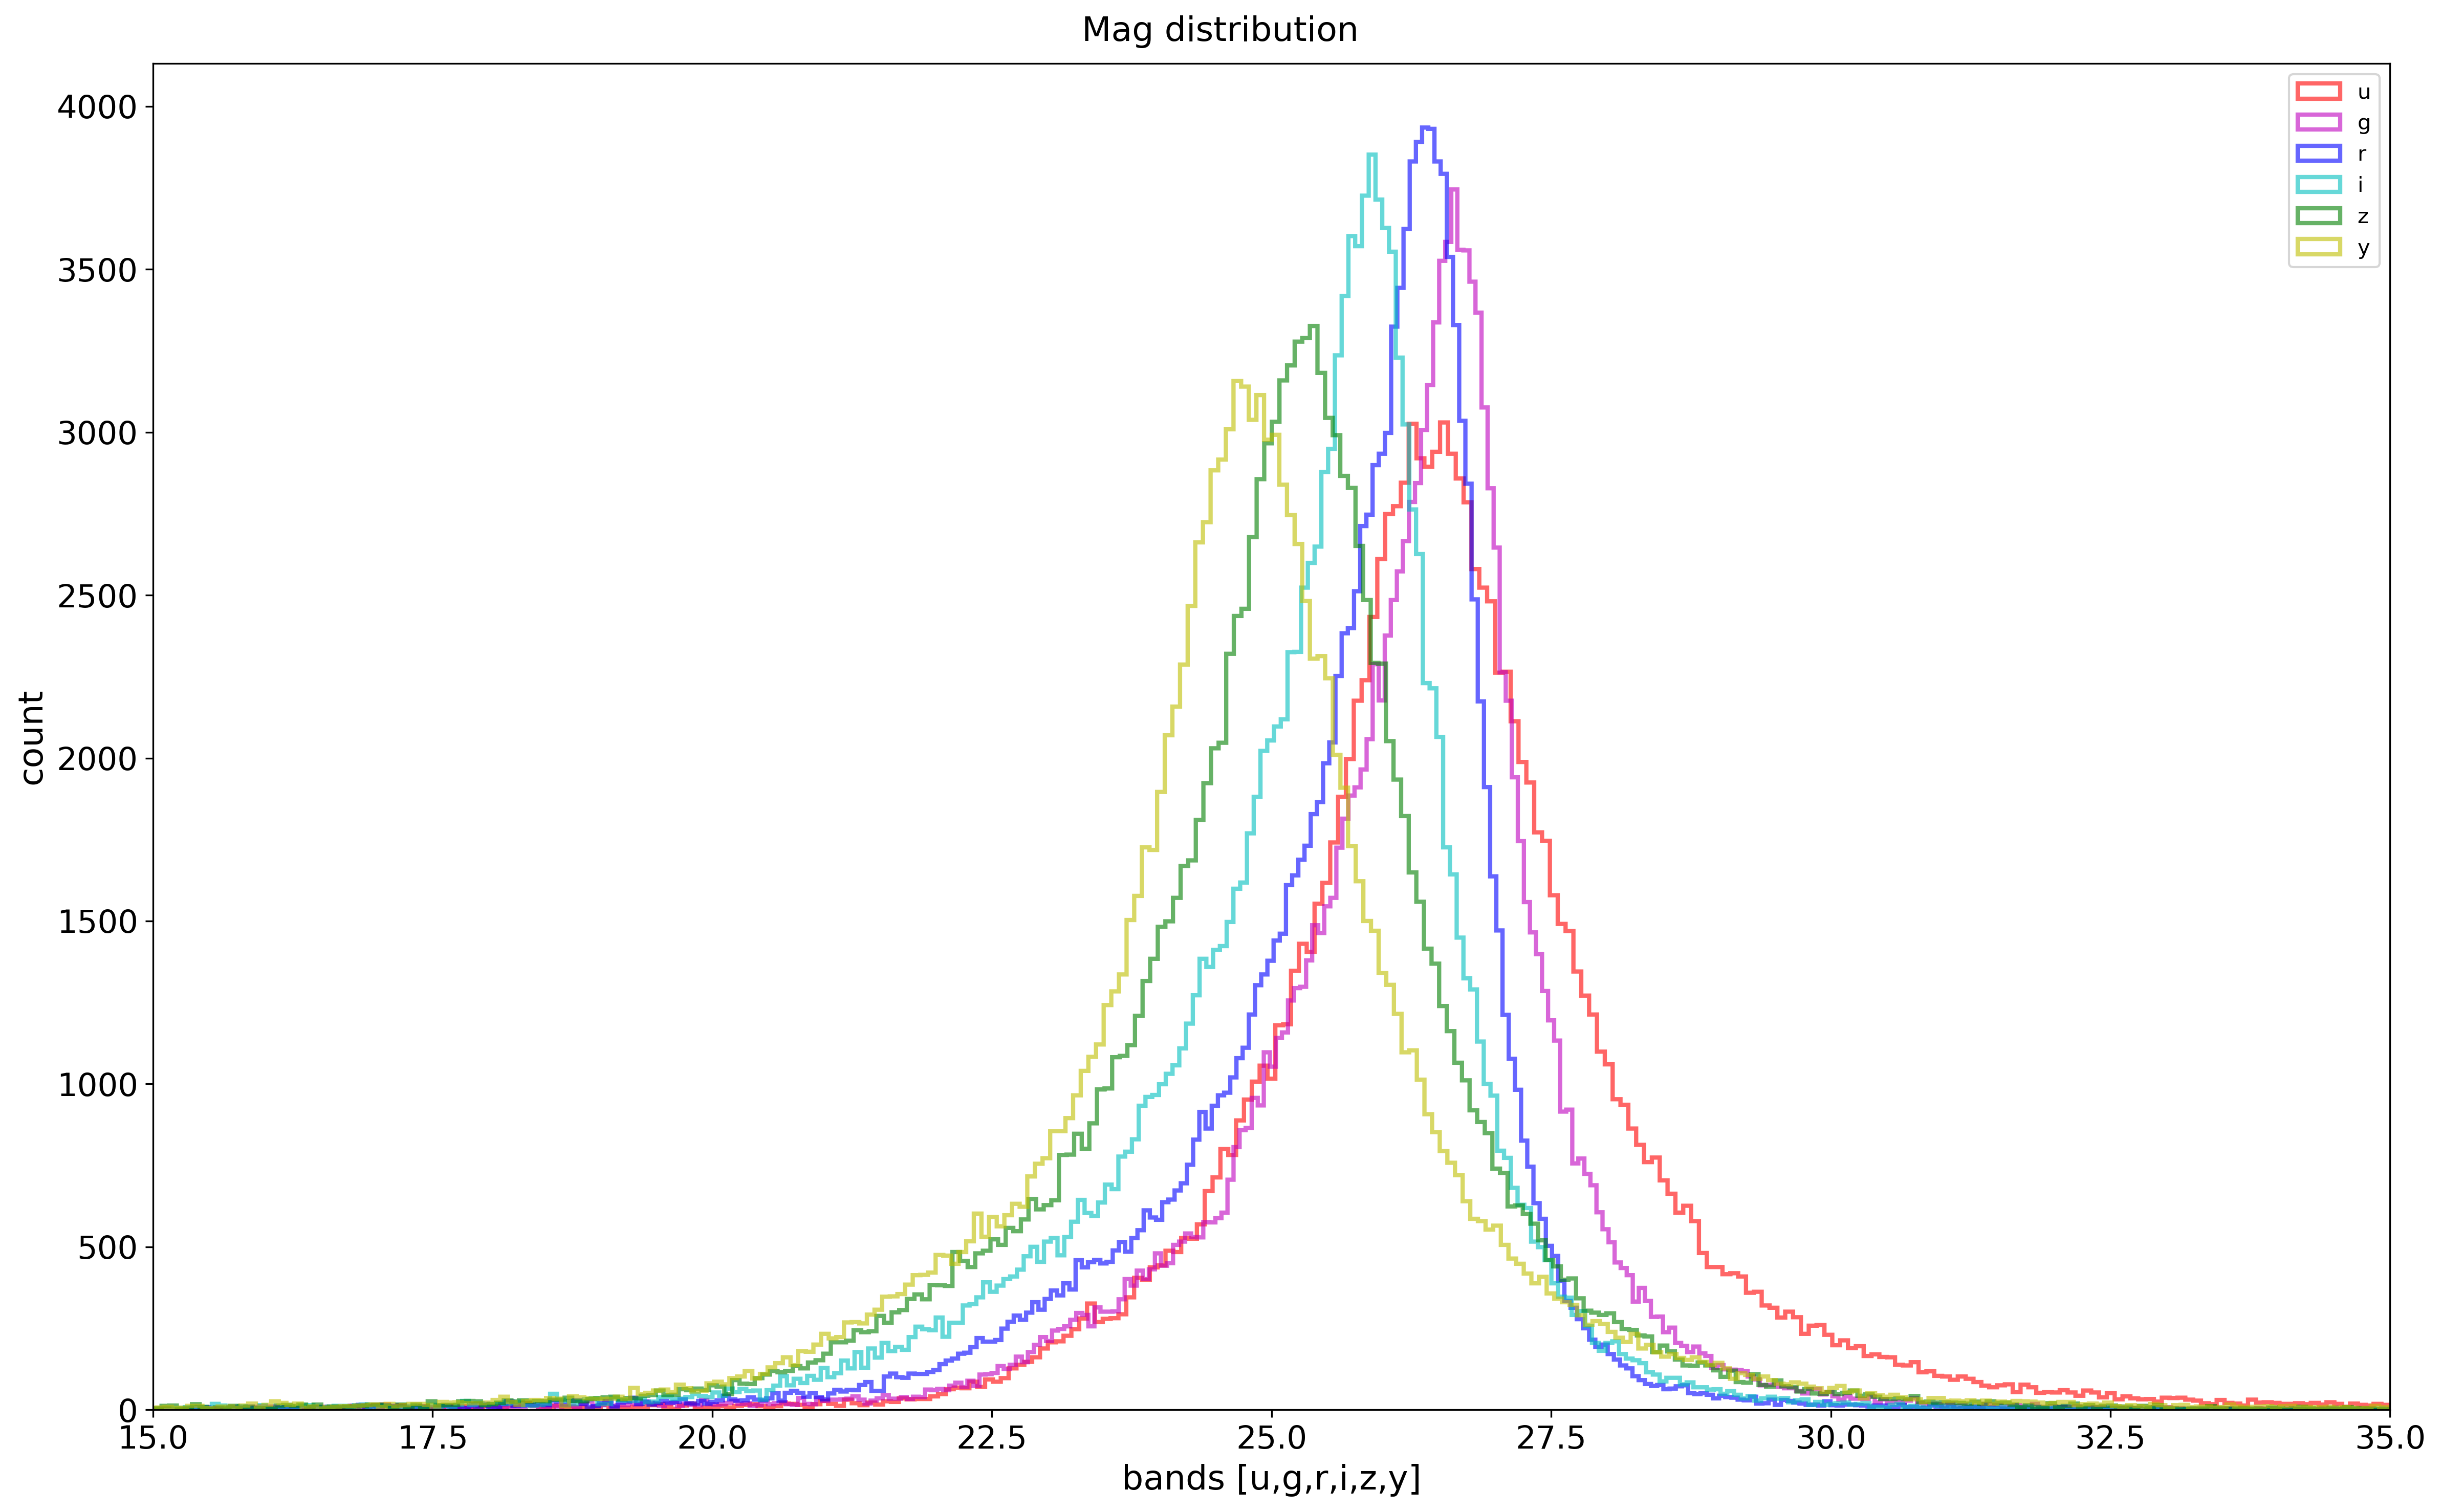

In [11]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Mag distribution", fontsize=16)

for key, value in banda_cor.items():
    plt.hist(merged_df[f"mag_{key}"], bins="fd", color=f"{banda_cor.get(key)}", label=key, histtype='step', lw=2, alpha = 0.6)
    
plt.xlabel(f"bands [u,g,r,i,z,y]", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(15, 35)
plt.legend()
plt.tight_layout()

## Plot - Magnitude x Erro 

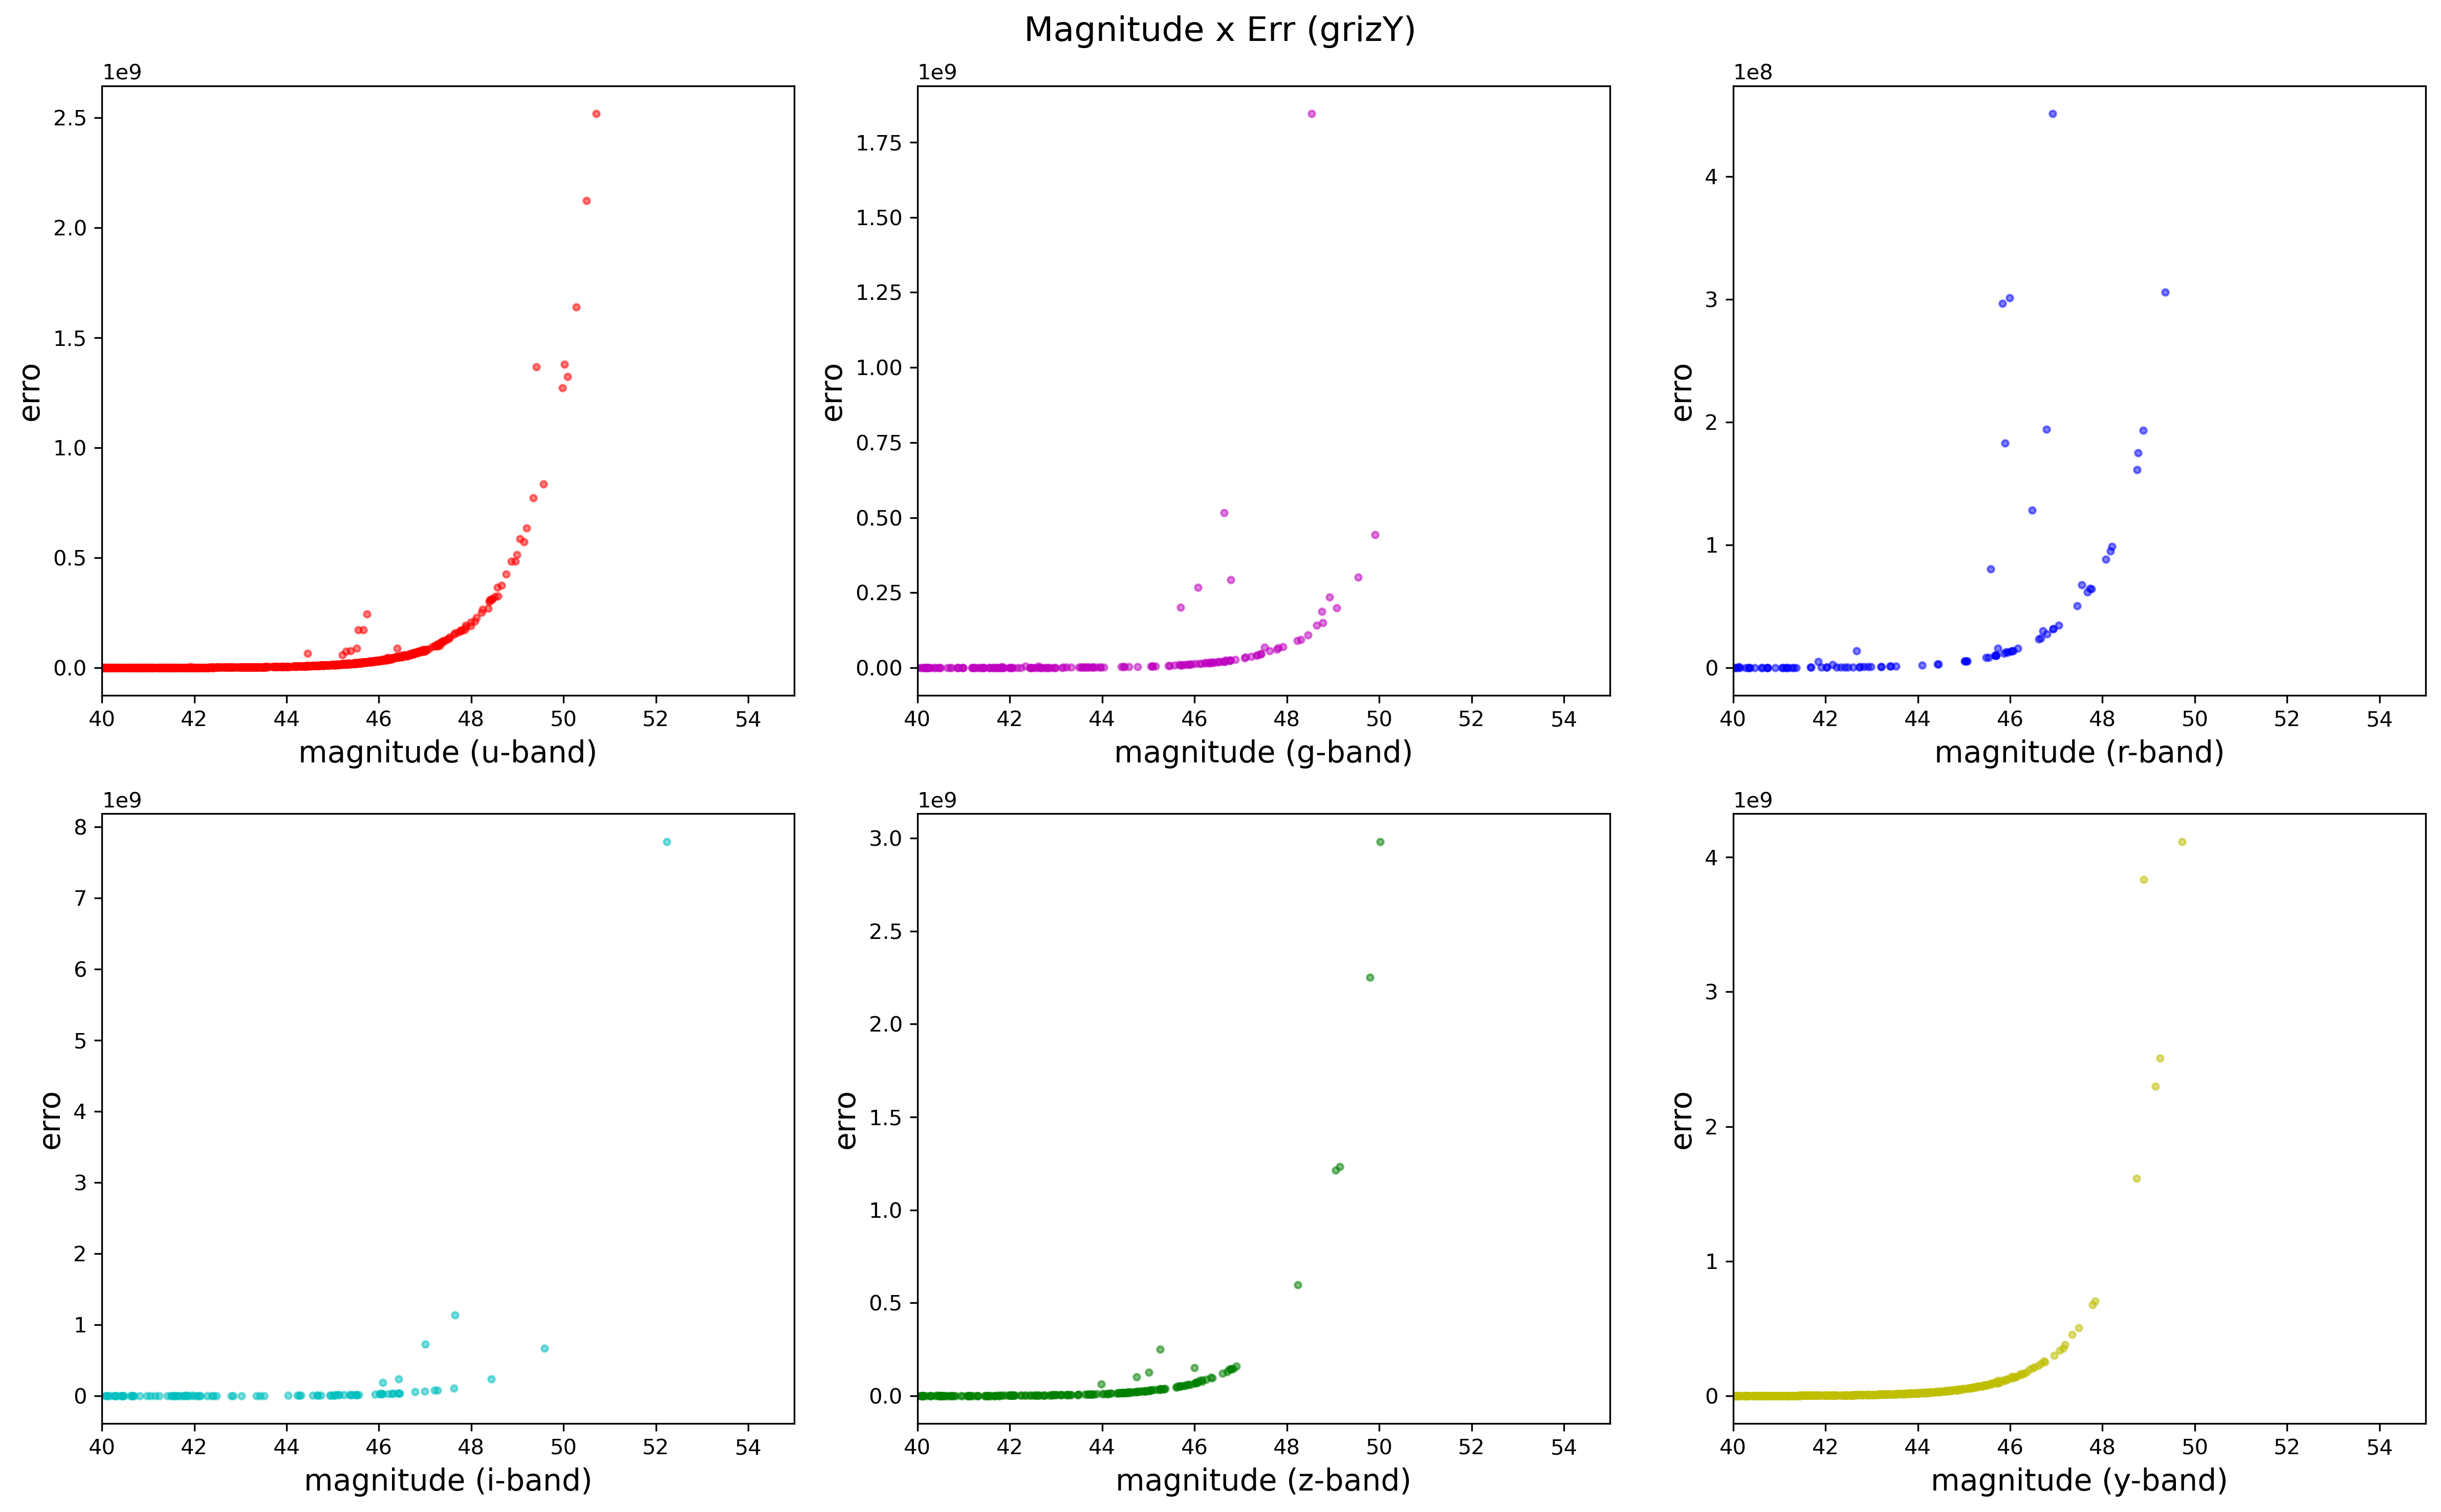

In [12]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Err (grizY)", fontsize=16)

pos_grafico = 1

for key, value in banda_cor.items():
    plt.subplot(2,3,pos_grafico)
    plt.plot(merged_df[f"mag_{key}"], merged_df[f"magerr_{key}"], f"{value}.", alpha=0.5)
    #plt.scatter(test_table[f"mag_{key}"], test_table[f"magerr_{key}"], color='blue', marker='o', label='Data Points')
    plt.xlabel(f"magnitude ({key}-band)", fontsize=14)
    plt.ylabel("erro", fontsize=14)
    plt.xlim(40, 55)
 #   plt.ylim(0, 120)
    plt.tight_layout()

    pos_grafico = pos_grafico + 1

## Plot S/N x magnitude

In [13]:
def mag_sr(pos, key, x_min=15, x_max=30, y_min=0, y_max=60):
    plt.subplot(2,3,pos)
    plt.plot(merged_df[f"mag_{key}"], 1/merged_df[f"magerr_{key}"], f"{banda_cor.get(key)}.", alpha=0.2, label=key)

    plt.xlabel(f"Mag ({key}_band)", fontsize=16)
    plt.ylabel("S/R", fontsize=16)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(14,25)
    #plt.hlines(10, 0, 50)

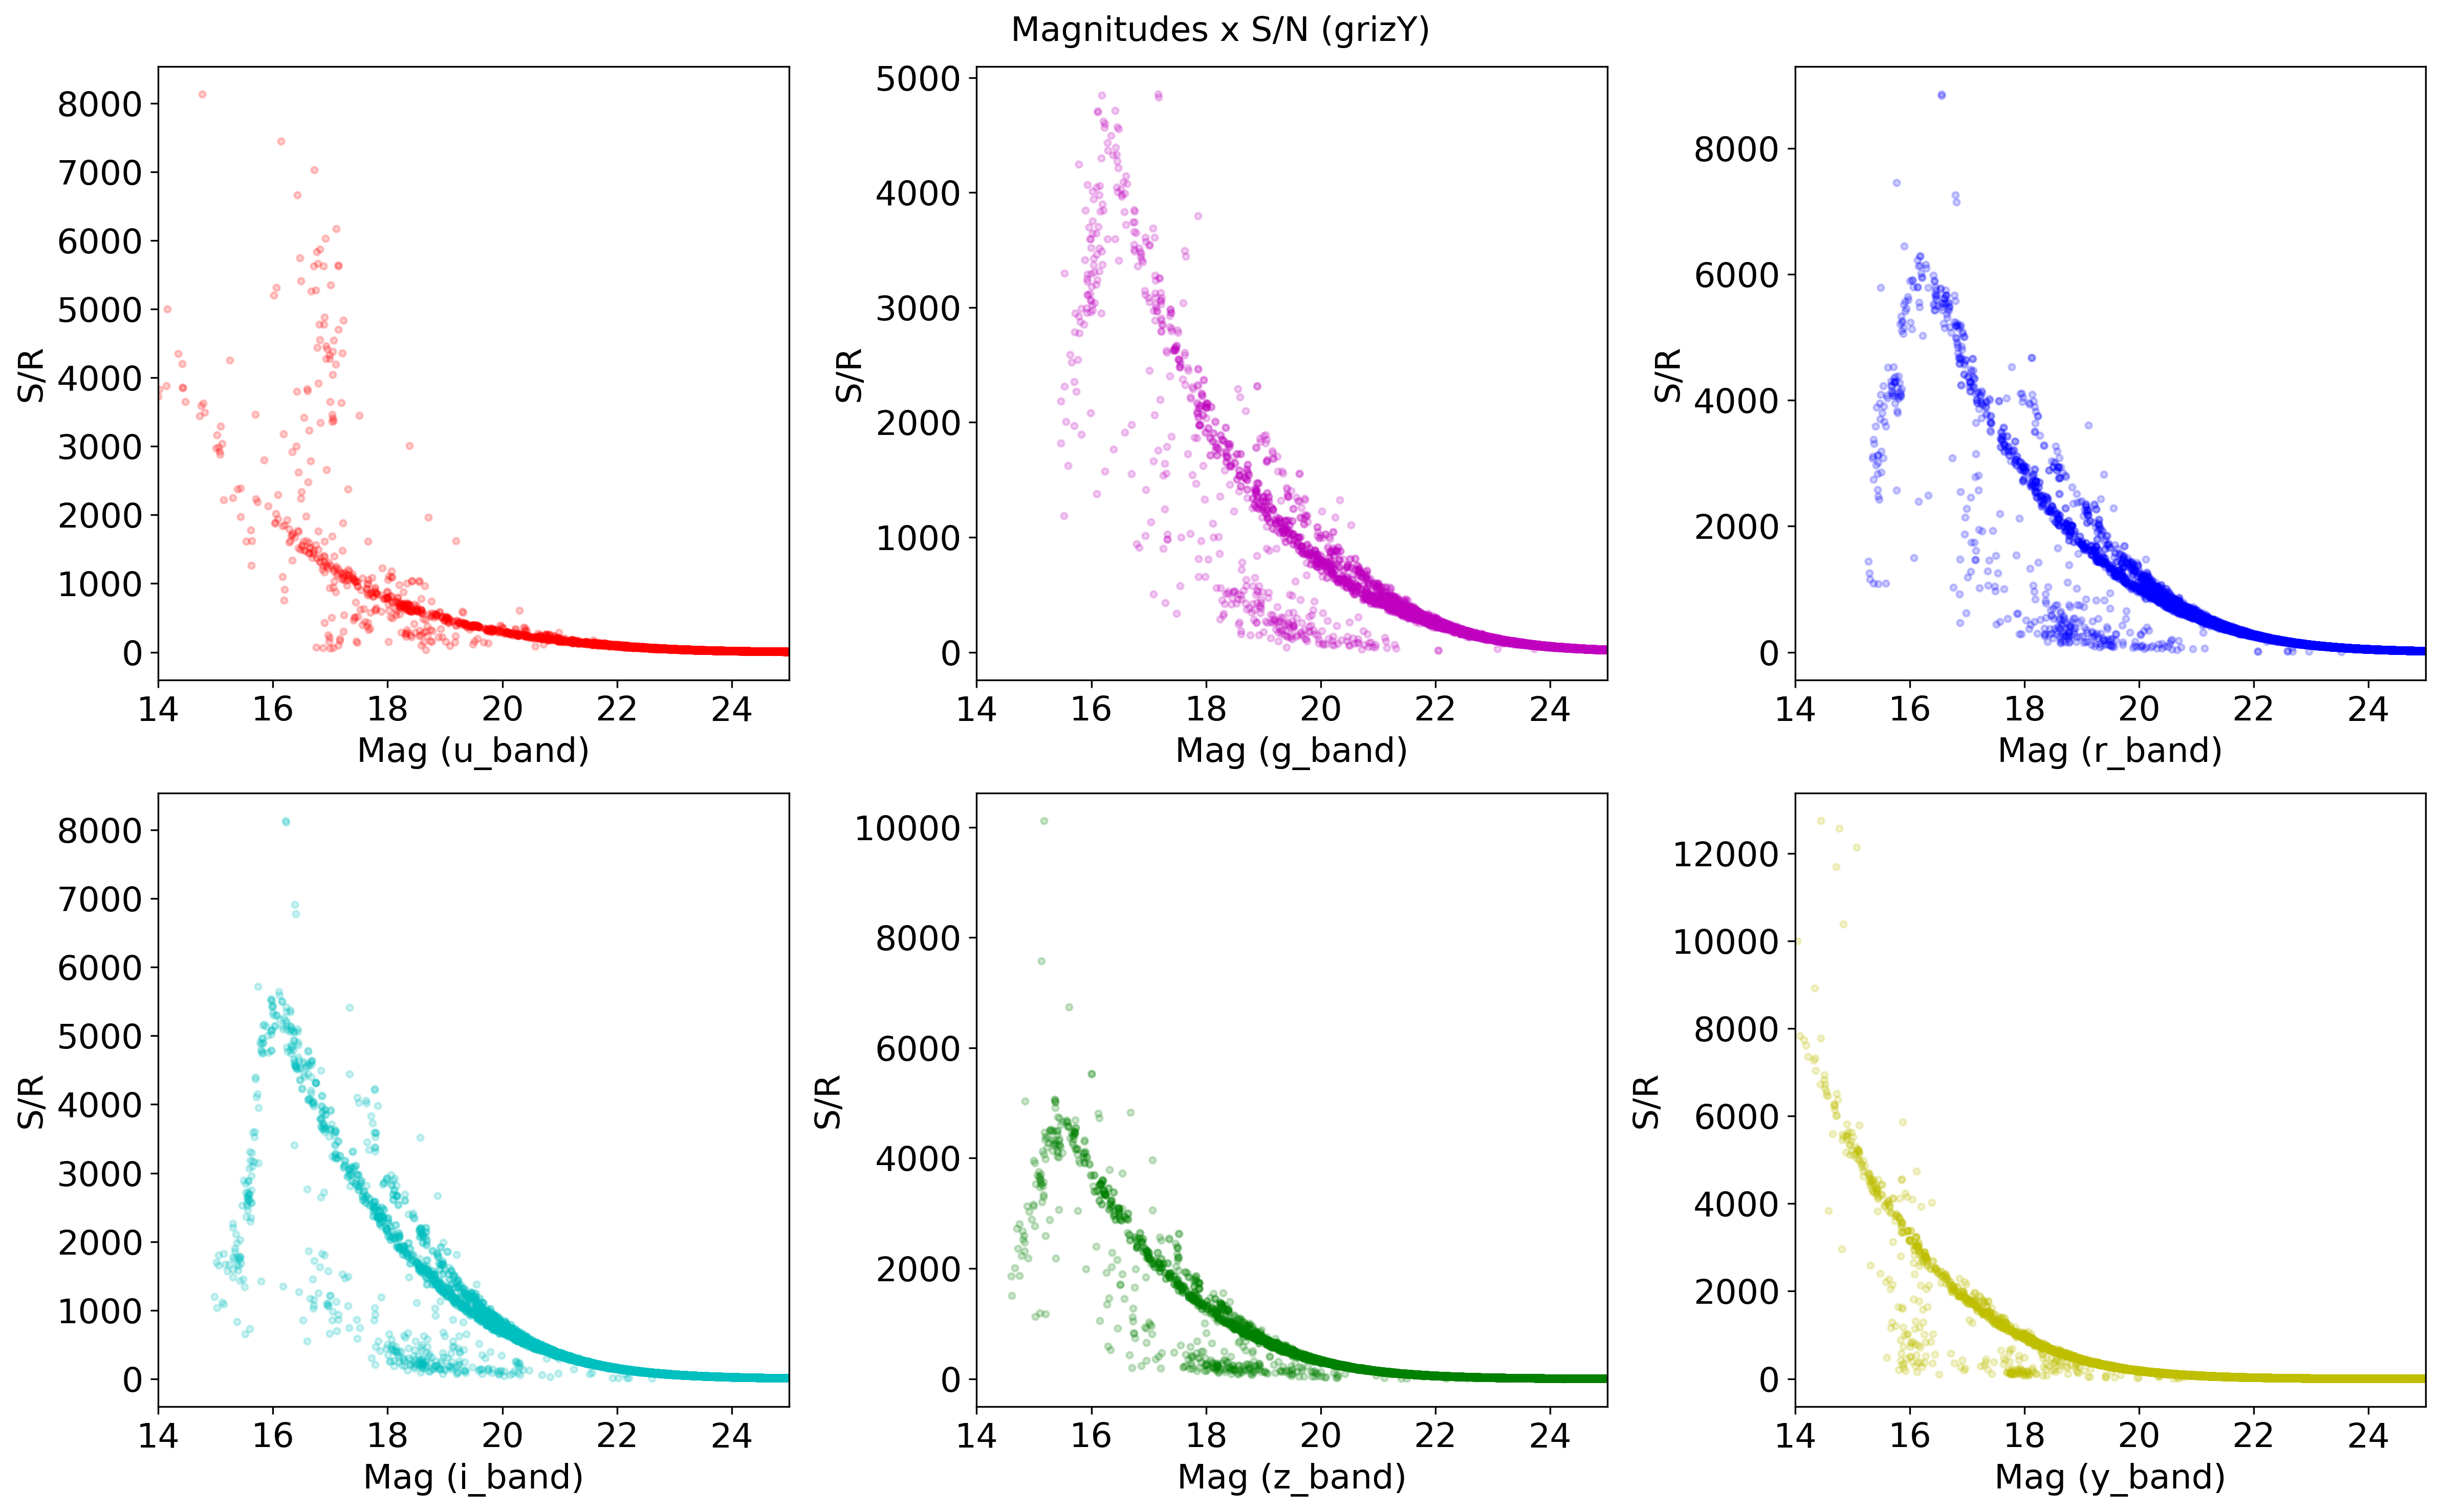

In [14]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitudes x S/N (grizY)", fontsize=16)

bandas = list(banda_cor)

mag_sr(1, bandas[0], 20, 28, 0, 15)
mag_sr(2, bandas[1], 21, 27, 0, 30)
mag_sr(3, bandas[2], 21, 26, 0, 30)
mag_sr(4, bandas[3], 21, 26, 0, 30)
mag_sr(5, bandas[4], 20, 26, 0, 30)
mag_sr(6, bandas[5], 19, 26, 0, 20)

plt.tight_layout()

NameError: name 'qtd_cor' is not defined

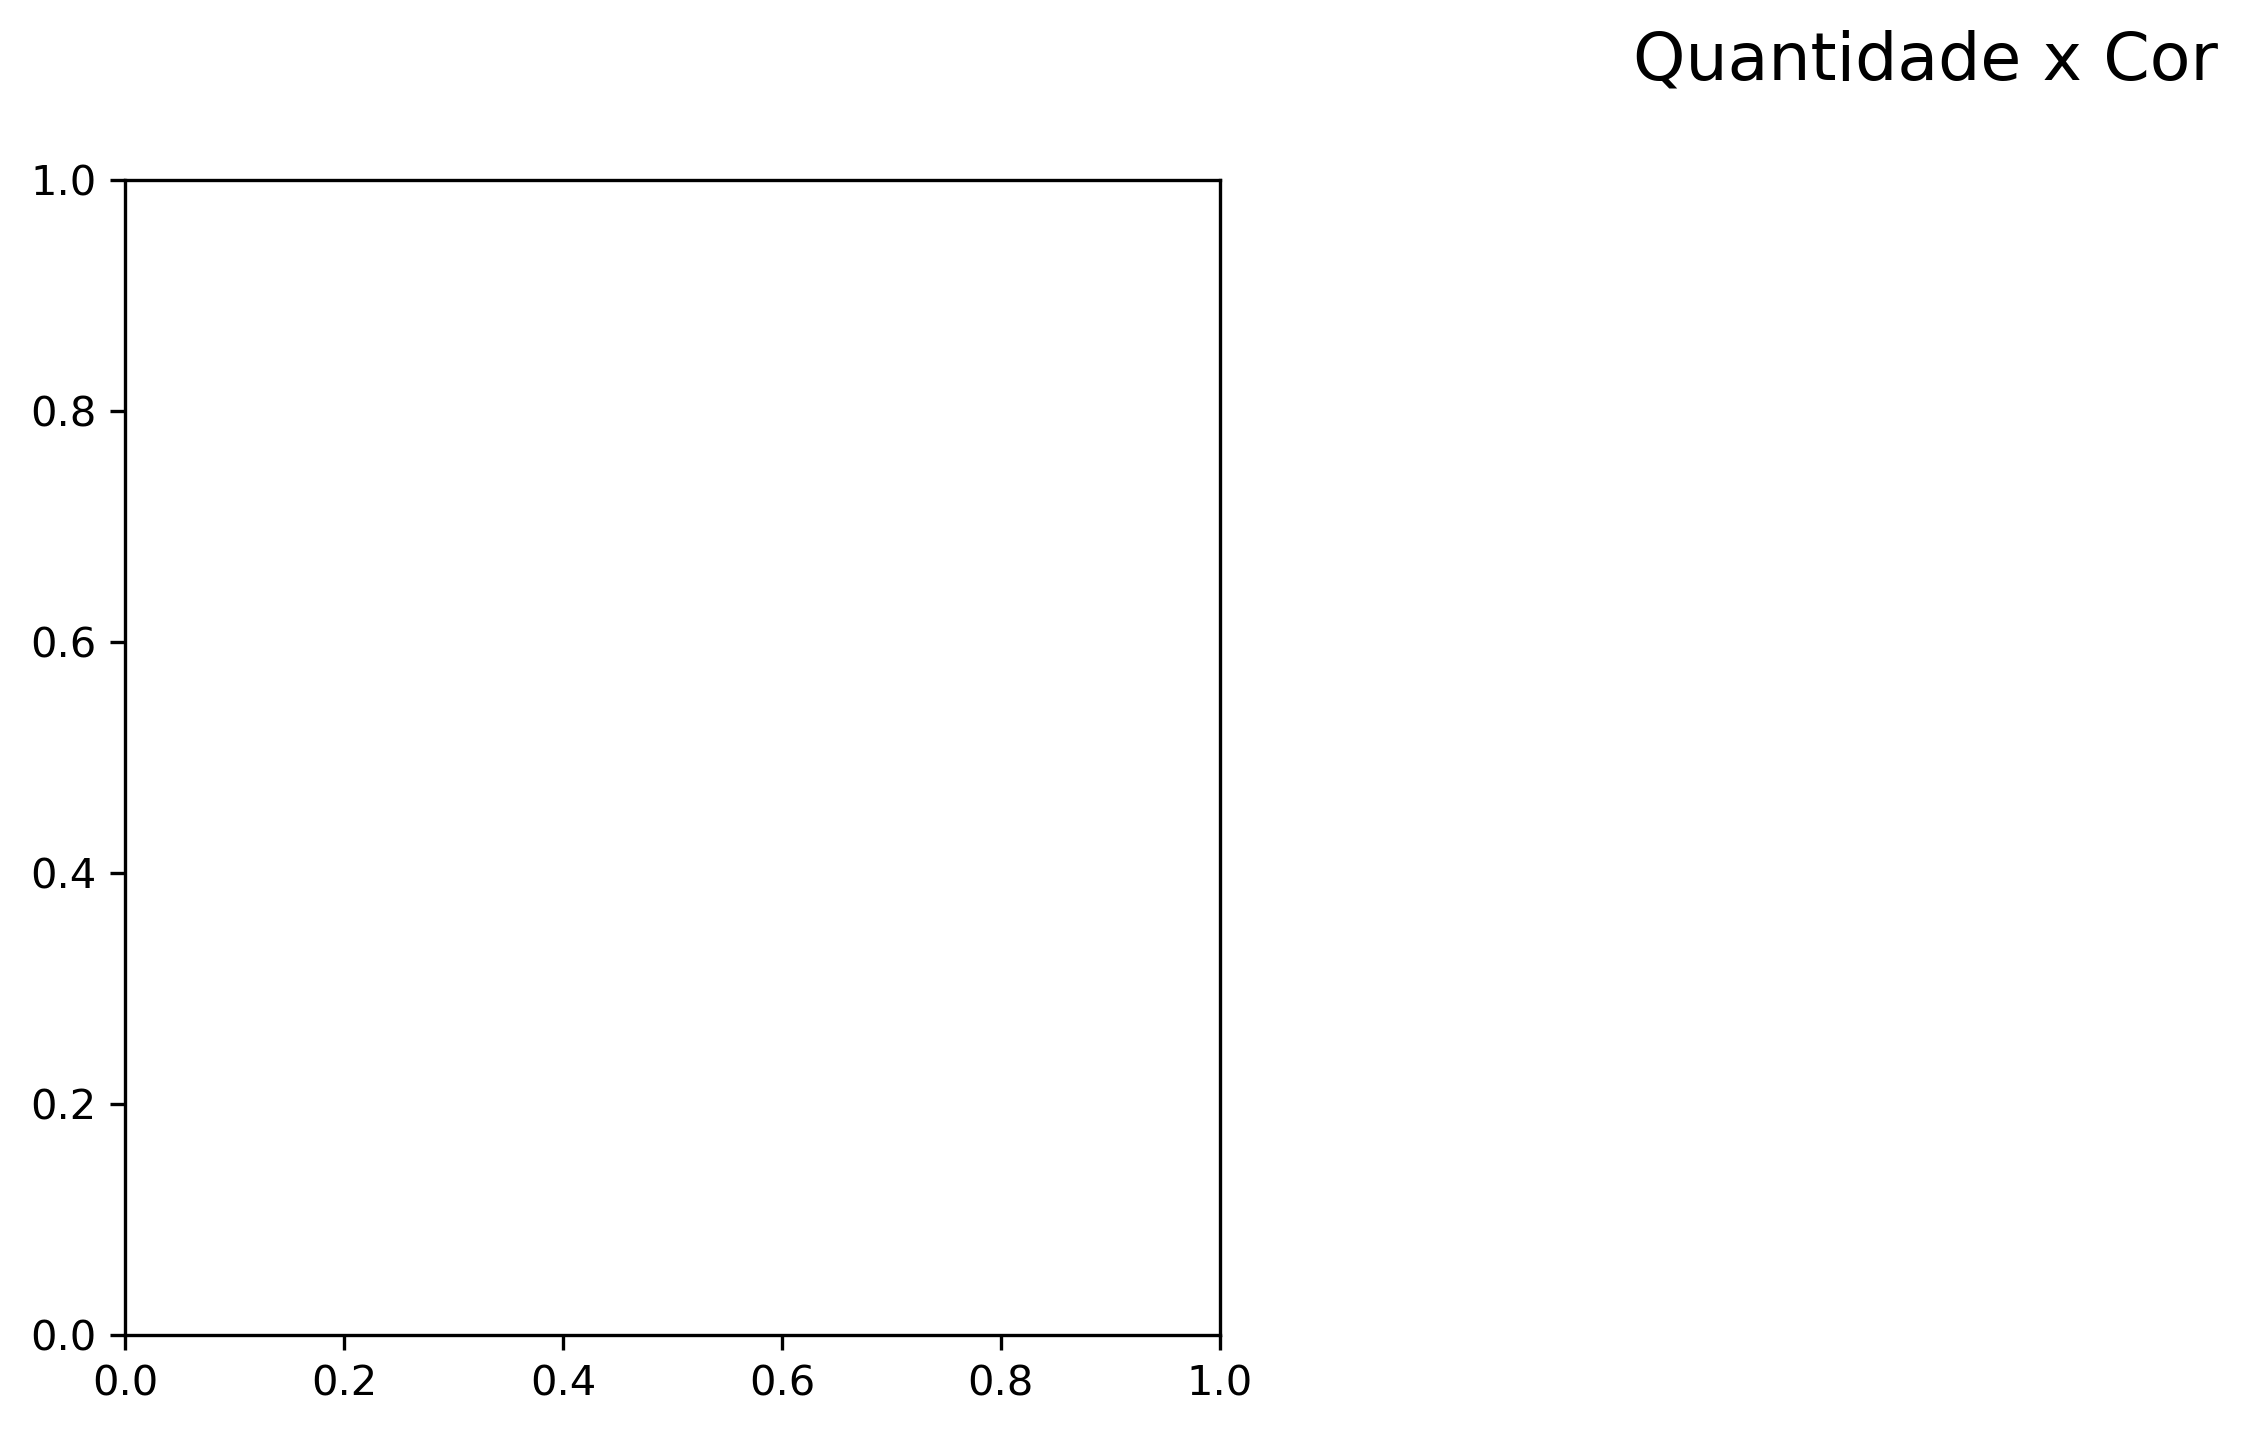

In [15]:
plt.figure(figsize=[16,5], dpi=300)
plt.suptitle("Quantidade x Cor", fontsize=16)

plt.subplot(1,3,1)
qtd_cor("g", "r")

plt.subplot(1,3,2)
qtd_cor("r", "i")

plt.subplot(1,3,3)
qtd_cor("i", "z")

plt.tight_layout()

## ORIGINAL FILES

In [ ]:
df = pd.read_csv("~/ic-photoz/Fase3-PCW23/results/dp0.2_original_file_sizes.csv", sep='\s+', header=None)
data = {
    'size': df.iloc[:, 0],
    'name': df.iloc[:, 1].str.replace(r'dp0.2_original/', '')    
}

df_original = pd.DataFrame(data, columns=['size', 'name'])
df_original.head()

In [ ]:
df_processed = pd.read_csv("~/ic-photoz/Fase3-PCW23/results/dp0.2_pre_processed_file_sizes.csv", sep='\s+', header=None)
data = {
    'size': df_processed.iloc[:, 0],
    'name': df_processed.iloc[:, 1].str.replace(r'dp0.2_pre_processed/', '')    
}

df_processed =  pd.DataFrame(data, columns=['size', 'name'])
df_processed.head()

In [ ]:
# sizes = []
# names = []

# for file in df_original['name']:
#     file_name = df_processed[df_processed['name' == file]]
#     print(file_name)

# data = {
#     'size': sizes,
#     'name': names,
# }

# df_processed_grouped =  pd.DataFrame(data, columns=['size', 'name'])
# df_processed_grouped.head()

In [ ]:
plt.figure(figsize=[16,5], dpi=300)

plt.subplot(1,2,1)
plt.title(f"Original files - {len(df_original['size'])}", fontsize=16)

plt.hist(df_original['size']/1_000_000, bins=50, alpha=0.6, label=f"sizes")
plt.ylabel("count", fontsize=16)
plt.xlabel(f"size (GB)", fontsize=16)
plt.tight_layout()

plt.subplot(1,2,2)
plt.title(f"Pre Processed files - {len(df_processed['size'])}", fontsize=16)
plt.hist(df_processed['size']/1_000, bins=50, alpha=0.6, label=f"sizes")
plt.xlabel(f"size (KB)", fontsize=16)
    
plt.tight_layout()

In [ ]:
plt.figure(figsize=[16,8])
plt.title("pdf_stack - fzboost")

pattern = 'bin_.*'

data = pd.read_csv('~/ic-photoz/Fase3-PCW23/outputs/nz_pdf_stack_test_fzboost_301_bins.csv')
filtered_df = data.filter(regex=pattern)
data = filtered_df.sum(axis=0)

x_values = np.linspace(0, 3, 301)
y_values_301 = data[:].values


data = pd.read_csv('~/ic-photoz/Fase3-PCW23/outputs/nz_pdf_stack_test_fzboost_201_bins.csv')
filtered_df = data.filter(regex=pattern)
y_values_201 = filtered_df.sum(axis=0)[:].values

data = pd.read_csv('~/ic-photoz/Fase3-PCW23/outputs/nz_pdf_stack_test_fzboost_101_bins.csv')
filtered_df = data.filter(regex=pattern)
y_values_101 = filtered_df.sum(axis=0)[:].values

data = pd.read_csv('~/ic-photoz/Fase3-PCW23/outputs/nz_pdf_stack_test_fzboost_31_bins.csv')
filtered_df = data.filter(regex=pattern)
y_values_31 = filtered_df.sum(axis=0)[:].values

plt.plot(np.linspace(0, 3, 200), y_values_201, label="201 bins")
plt.plot(np.linspace(0, 3, 301), y_values_301, label="301 bins")
plt.plot(np.linspace(0, 3, 100), y_values_101, label="101 bins")
plt.plot(np.linspace(0, 3, 30), y_values_31, label="31 bins")

plt.xlabel('bins', size=16)
plt.ylabel('sum values in each bin', size=16)

plt.legend(prop={'size': 14})
plt.show()

In [ ]:
all_dec = pd.read_csv('~/ic-photoz/Fase3-PCW23/outputs/nz_zmodes_hist_bpz_all_dec_cases_chunk_150k.csv')
trunc = pd.read_csv('~/ic-photoz/Fase3-PCW23/outputs/nz_zmodes_hist_bpz_trunc4_chunk_150k.csv')

In [ ]:
pattern = 'bin_.*'

filtered_df = all_dec.filter(regex=pattern)
all_dec_zmodes = filtered_df.sum(axis=0)[:].values

filtered_df = trunc.filter(regex=pattern)
trunc_zmodes = filtered_df.sum(axis=0)[:].values

plt.figure(figsize=[16,8])
plt.title("Bpz rounded vs all decimal cases")

plt.plot(np.linspace(0, 3, 300), all_dec_zmodes, label="all", color="k")
plt.plot(np.linspace(0, 3, 300), trunc_zmodes, label="round", color="y", ls="--")

plt.xlabel('bins', size=16)
plt.ylabel('zmodes', size=16)

plt.legend(prop={'size': 14})
plt.show()

In [ ]:
all_dec = pd.read_csv('~/ic-photoz/Fase3-PCW23/outputs/nz_zmodes_hist_fzboost_all_dec_cases_chunk_150k.csv')
trunc = pd.read_csv('~/ic-photoz/Fase3-PCW23/outputs/nz_zmodes_hist_fzboost_trunc4_chunk_150k.csv')

In [ ]:
pattern = 'bin_.*'

filtered_df = all_dec.filter(regex=pattern)
all_dec_zmodes = filtered_df.sum(axis=0)[:].values

filtered_df = trunc.filter(regex=pattern)
trunc_zmodes = filtered_df.sum(axis=0)[:].values

In [ ]:
plt.figure(figsize=[16,8])
plt.suptitle("fzboost rounded vs all decimal cases")

plt.plot(np.linspace(0, 3, 300), all_dec_zmodes, label="all", color="k")
plt.plot(np.linspace(0, 3, 300), trunc_zmodes, label="round", color="y", ls="--")

plt.xlabel('bins', size=16)
plt.ylabel('zmodes', size=16)

plt.legend(prop={'size': 14})
plt.show()

In [ ]:
import h5py

all_dec_cases = []

with h5py.File("/home/heloisa.mengisztki/data/objectTable_tract_5074_DC2_2_2i_runs_DP0_2_v23_0_1_PREOPS-905_step3_31_20220314T212509Z-part9-all-fz.pq", 'r') as file:
    all_dec_cases = file['ancil']['zmode'][:]


trunc_dec_cases = []
with h5py.File("/home/heloisa.mengisztki/data/objectTable_tract_5074_DC2_2_2i_runs_DP0_2_v23_0_1_PREOPS-905_step3_31_20220314T212509Z-part9-trunc-fz.pq", 'r') as file:
    trunc_dec_cases = file['ancil']['zmode'][:]

In [ ]:
len(trunc_dec_cases), len(all_dec_cases)

In [ ]:
plt.figure(figsize=[8,8])
plt.title("fzboost rounded vs all decimal cases")

plt.scatter(trunc_dec_cases, all_dec_cases, label="round", color="k",  marker='.',  alpha=0.2)

plt.xlabel('z - all dec cases', size=16)
plt.ylabel('z - rounded', size=16)

plt.show()

In [ ]:
all_dec_cases = []

with h5py.File("/home/heloisa.mengisztki/data/objectTable_tract_5074_DC2_2_2i_runs_DP0_2_v23_0_1_PREOPS-905_step3_31_20220314T212509Z-part9-all-bpz.pq", 'r') as file:
    all_dec_cases = file['ancil']['zmode'][:]


trunc_dec_cases = []
with h5py.File("/home/heloisa.mengisztki/data/objectTable_tract_5074_DC2_2_2i_runs_DP0_2_v23_0_1_PREOPS-905_step3_31_20220314T212509Z-part9-trunc-bpz.pq", 'r') as file:
    trunc_dec_cases = file['ancil']['zmode'][:]

In [ ]:
plt.figure(figsize=[8,8])
plt.title("bpz rounded vs all decimal cases")

plt.scatter(trunc_dec_cases, all_dec_cases, label="round", color="k",  marker='.',  alpha=0.2)

plt.xlabel('z - all dec cases', size=16)
plt.ylabel('z - rounded', size=16)

plt.show()